<a href="https://colab.research.google.com/github/tejaboncheruvu/hotel-booking-analysis/blob/main/Individual_Notebook_Hotel_Booking_Analysis_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hotel_df = pd.read_csv("/content/drive/MyDrive/Data Science: AlmaBetter/Project 1: Hotel Booking Analysis EDA/Hotel Bookings.csv")

##Understanding Data

In [ ]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
hotel_df.shape

(119390, 32)

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


##Cleaning the data
1. Finding the null values
2. Finding duplicate values 

###Null Values

In [ ]:
hotel_df.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
hotel_df.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [ ]:
hotel_df[['company', 'agent']] = hotel_df[['company', 'agent']].fillna(0)

hotel_df['country'].fillna('others', inplace = True)

hotel_df['children'].fillna(hotel_df['children'].mean(), inplace = True)

In [ ]:
hotel_df.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

### Duplicate Values

In [ ]:
hotel_df[hotel_df.duplicated()]
hotel_df.drop_duplicates(inplace = True)

In [ ]:
hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

###1. What are the total confirmed bookings and cancellations in each hotel type?

In [ ]:
confirmed_bookings = hotel_df[hotel_df['is_canceled']==0]
confirmed_bookings_per_hotel = confirmed_bookings[['hotel']].value_counts()
confirmed_bookings_per_hotel

hotel       
City Hotel      37379
Resort Hotel    25992
dtype: int64

Text(0, 0.5, 'Hotel')

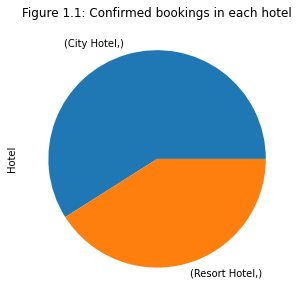

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
confirmed_bookings_per_hotel.plot(kind = 'pie')
plt.title('Figure 1.1: Confirmed bookings in each hotel')
plt.ylabel('Hotel')

####Inference
From the above figure 1.1 we can observe that city hotels have more number of confirmed and are receiving more number of guests than resort hotels.

In [ ]:
cancelled_bookings = hotel_df[hotel_df['is_canceled']==1]
cancelled_bookings_per_hotel = cancelled_bookings[['hotel']].value_counts()
cancelled_bookings_per_hotel

hotel       
City Hotel      16049
Resort Hotel     7976
dtype: int64

Text(0, 0.5, 'Hotel')

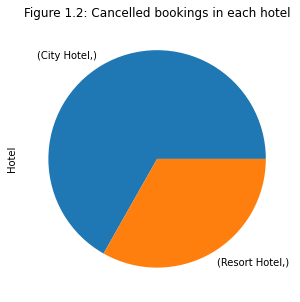

In [ ]:
cancelled_bookings_per_hotel.plot(kind = 'pie')
plt.title('Figure 1.2: Cancelled bookings in each hotel')
plt.ylabel('Hotel')

####**Inference**
From the above figure 1.2 we can observe that more customers are cancelling their bookings in the city hotels as compared to resort hotels.

###2. What is the repeated guest count in each hotel type?





In [ ]:
repeated_guest = hotel_df[hotel_df['is_repeated_guest']==1]
repeated_guest_per_hotel = repeated_guest[['hotel']].value_counts()
repeated_guest_per_hotel

hotel       
City Hotel      1708
Resort Hotel    1707
dtype: int64

Text(0, 0.5, 'Hotel')

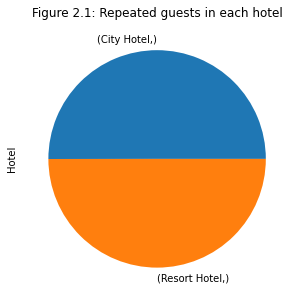

In [ ]:
repeated_guest_per_hotel.plot(kind = 'pie')
plt.title('Figure 2.1: Repeated guests in each hotel')
plt.ylabel('Hotel')

####Inference
1. From the above figure 2.1 we can observe that both city hotels and resort hotels have almost same number of repeated guests
2. As we have seen earlier in the figure 1.1, resort hotels have less confirmed bookings than city hotels. Therefore, by analysing the confirmed bookings and repeated guests of both hotels, we can say that resort hotels are performing better in terms of repeating guests, inspite of less bookings.

####3. Which month is the busiest month? What are the month wise bookings of each hotel?

In [ ]:
#monthly_bookings = hotel_df.groupby(['arrival_date_month'])['arrival_date_month'].count().sort_values(ascending = False)
monthly_bookings = hotel_df['arrival_date_month'].value_counts()
max_monthly_bookings = hotel_df['arrival_date_month'].value_counts().max()
print(max_monthly_bookings)
print(monthly_bookings)

11257
August       11257
July         10057
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: arrival_date_month, dtype: int64


Text(0, 0.5, 'Number of bookings')

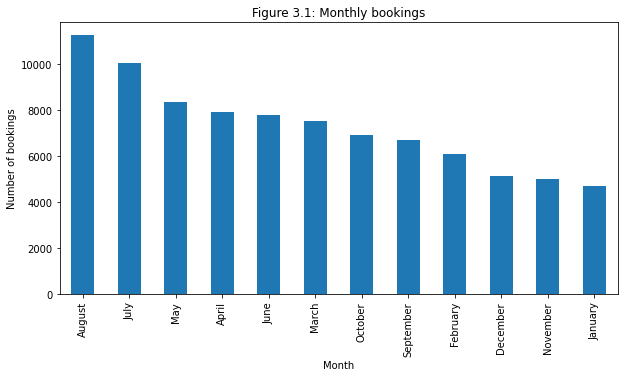

In [ ]:
monthly_bookings.plot(kind = 'bar')
plt.title('Figure 3.1: Monthly bookings')
plt.xlabel('Month')
plt.ylabel('Number of bookings')

####**Inference**
From the above figure 3.1 we can notice that 'August' is the busiest month with large number of customers willing to book hotels. 

In [ ]:
monthly_bookings_per_hotel = hotel_df.groupby(['hotel', 'arrival_date_month'])['arrival_date_month'].count().unstack()

print(monthly_bookings_per_hotel)

arrival_date_month  April  August  December  February  January  July  June  \
hotel                                                                        
City Hotel           5080    6591      3014      3605     2730  5744  5005   
Resort Hotel         2828    4666      2117      2493     1963  4313  2760   

arrival_date_month  March   May  November  October  September  
hotel                                                          
City Hotel           4856  5413      2942     4208       4240  
Resort Hotel         2657  2942      2053     2726       2450  


Text(0, 0.5, 'Number of bookings')

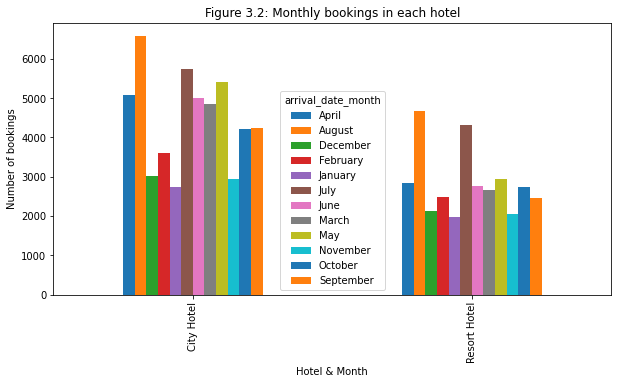

In [ ]:
monthly_bookings_per_hotel.plot(kind = 'bar')
plt.title('Figure 3.2: Monthly bookings in each hotel')
plt.xlabel('Hotel & Month')
plt.ylabel('Number of bookings')

####**Inference**
The above figure 3.2 shows the monthly booking in each hotel. Here we can notice that 'August' is the busiest month and 'January' is the month with low bookings in both city hotels and resort hotels.

Text(0, 0.5, 'Number of bookings')

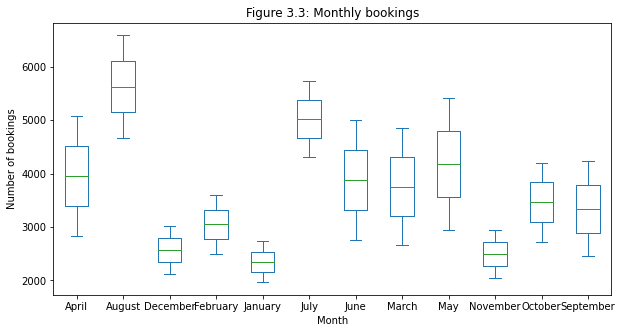

In [ ]:
# Creating box plot for monthly bookings in each hotel
monthly_bookings_per_hotel.plot(kind = 'box')
plt.title('Figure 3.3: Monthly bookings')
plt.xlabel('Month')
plt.ylabel('Number of bookings')


####**Inference**
The above figure 3.3 shows the minimum, maximum and average bookings in each hotel for different months. 

####4. What is the most preferred meal type?


In [ ]:
meal_types_count = hotel_df['meal'].value_counts()
preferred_meal_type = meal_types_count.max()
preferred_meal_type

67978

Text(0, 0.5, 'Count')

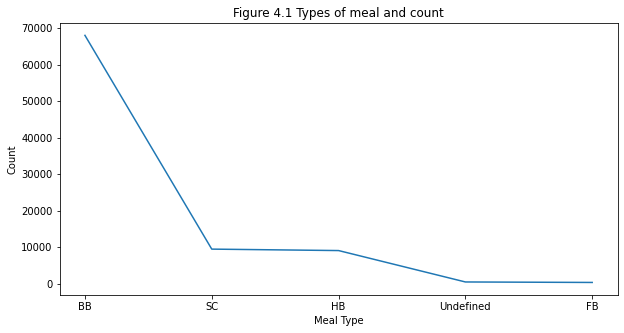

In [ ]:
plt.plot(meal_types_count)
#meal_types_count.plot(kind = 'line')
plt.title('Figure 4.1 Types of meal and count')
plt.xlabel('Meal Type')
plt.ylabel('Count')

####**Inference**
1. The above figure 4.1 shows different meal types and number of people opted for each meal. 
2. From the figure we can observe that BB is the most preferred meal type. The number of people who selected BB is meal type is 92310.

####5. Which country accounts for the largest number of bookings?


In [ ]:
bookings_from_country = hotel_df['country'].value_counts()
print(bookings_from_country)
max_bookings_from_country = bookings_from_country.max()
print(max_bookings_from_country)

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 178, dtype: int64
27453


Text(0.5, 1.0, 'Figure 5.1 Bookings from different countries')

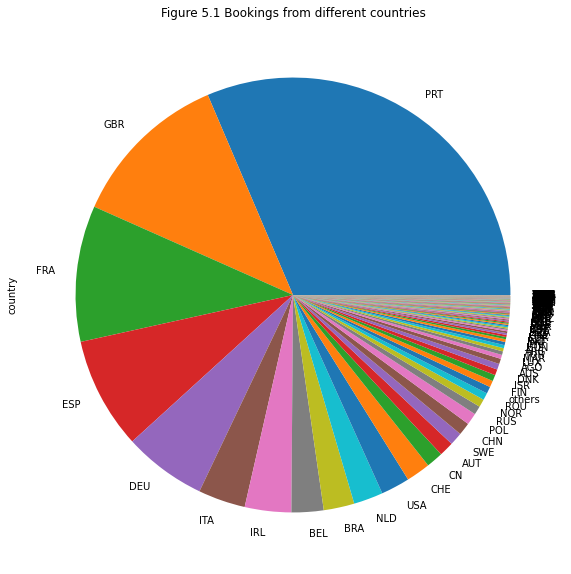

In [ ]:
plt.rcParams['figure.figsize'] = (10,10)
bookings_from_country.plot(kind = 'pie')
plt.title('Figure 5.1 Bookings from different countries')

####**Inference**
1. From the above figure 5.1 we can observe that Portugal(PTR) accounts for the most number of customers, followed by United Kingdom(GBR), France(FRA) and others.
2. A total of 48590 bookings are coming from Portugal.

####6. Which type of customers are booking the hotels more?


In [ ]:
market_segment_wise_bookings = hotel_df['market_segment'].value_counts()
#market_segment_wise_bookings = hotel_df.groupby(['market_segment', 'hotel' ])['market_segment'].count().unstack()

print(market_segment_wise_bookings)
max_market_segment_bookings = market_segment_wise_bookings.max()
print(max_market_segment_bookings)

Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64
51618


Text(0, 0.5, 'Number of bookings')

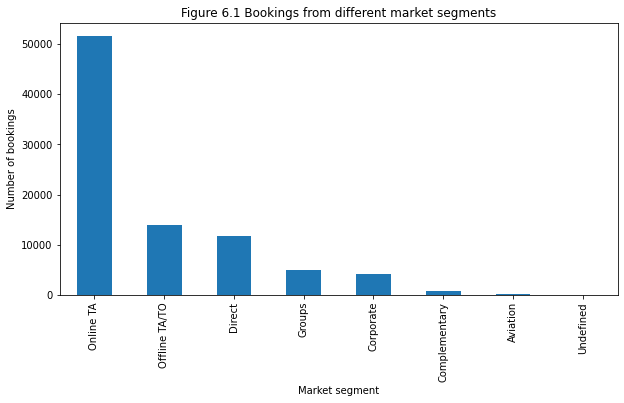

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
market_segment_wise_bookings.plot(kind = 'bar')
plt.title('Figure 6.1 Bookings from different market segments')
plt.xlabel('Market segment')
plt.ylabel('Number of bookings')

####**Inference**
1. From the above figure 6.1 we can observe that customers are booking more from Online TA, followed by Offline TA/TO, direct, groups, corporate, etc.
2. The most number of bookings are coming from Offline TA. The number of bookings from Offline TA is 51618

####7. How many customers are asking for car parking space?


In [ ]:
customers_asking_for_car_parking = hotel_df[hotel_df['required_car_parking_spaces'] == 1]
car_parking_hotel_wise = customers_asking_for_car_parking['hotel'].value_counts()
car_parking_hotel_wise
total_customers_for_car_parkings = car_parking_hotel_wise.sum()
total_customers_for_car_parkings

7280

Text(0, 0.5, 'Number of customers')

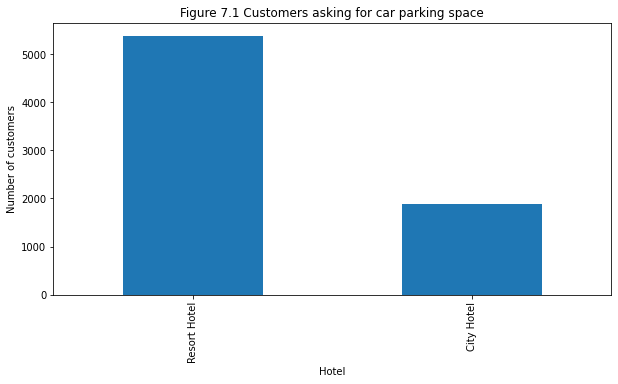

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
car_parking_hotel_wise.plot(kind = 'bar')
plt.title('Figure 7.1 Customers asking for car parking space')
plt.xlabel('Hotel')
plt.ylabel('Number of customers')

#### Inference
1. From the figure 7.1 we can observe that more number of customers from resort hotels are asking for car parking space.
2. Inspite of less number of bookings, more resort hotel customers are asking for car parking space.

Total number of customers asking for car parking space is 7280

#### 8. What is total number of guests in week and weekends in each hotel?


In [ ]:
week_bookings = hotel_df[hotel_df['stays_in_week_nights']==1]
week_bookings_per_hotel = week_bookings[['hotel']].value_counts()
week_bookings_per_hotel

hotel       
City Hotel      14471
Resort Hotel     7720
dtype: int64

Text(0, 0.5, 'Hotel')

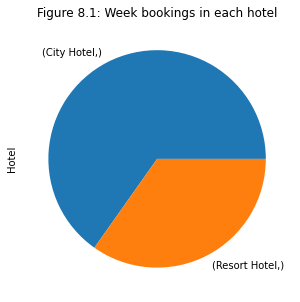

In [ ]:
week_bookings_per_hotel.plot(kind = 'pie')
plt.title('Figure 8.1: Week bookings in each hotel')
plt.ylabel('Hotel')

### Inference
The week guests from city hotels and resort hotels are 14471 and 7720 respectively. 

In [ ]:
weekend_bookings = hotel_df[hotel_df['stays_in_weekend_nights']==1]
weekend_bookings_per_hotel = weekend_bookings[['hotel']].value_counts()
weekend_bookings_per_hotel

hotel       
City Hotel      15171
Resort Hotel     7486
dtype: int64

Text(0, 0.5, 'Hotel')

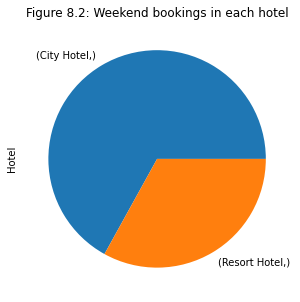

In [ ]:
weekend_bookings_per_hotel.plot(kind = 'pie')
plt.title('Figure 8.2: Weekend bookings in each hotel')
plt.ylabel('Hotel')

#### Inference
The weekend guests from city hotels and resort hotels are 15171 and 7486 respectively.

#### 9. Which type of hotel is making more revenue? What is the average revenue of each hotel?

In [ ]:
hotel_type = hotel_df.groupby(['hotel'])
revenue_by_hotel = hotel_type['adr'].sum()
print(revenue_by_hotel)
average_daily_revenue_by_hotel = hotel_type['adr'].mean()
print(average_daily_revenue_by_hotel)


hotel
City Hotel      5929757.03
Resort Hotel    3363692.96
Name: adr, dtype: float64
hotel
City Hotel      110.985944
Resort Hotel     99.025346
Name: adr, dtype: float64


Text(0, 0.5, 'Revenue in millions')

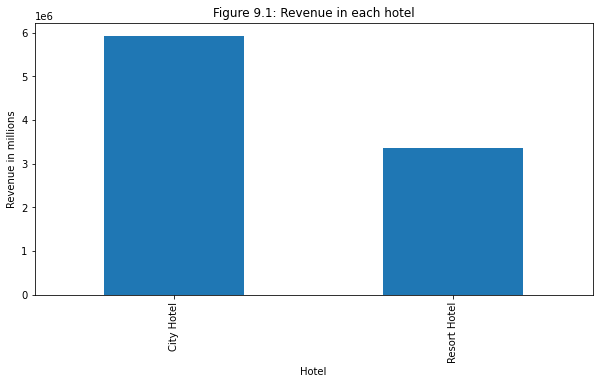

In [ ]:
revenue_by_hotel.plot(kind = 'bar')
plt.title('Figure 9.1: Revenue in each hotel')
plt.xlabel('Hotel')
plt.ylabel('Revenue in millions')

####Inference
From the above figure 9.1 we can observe that city hotels are making more revenue than resort hotels. 

Text(0, 0.5, 'Revenue')

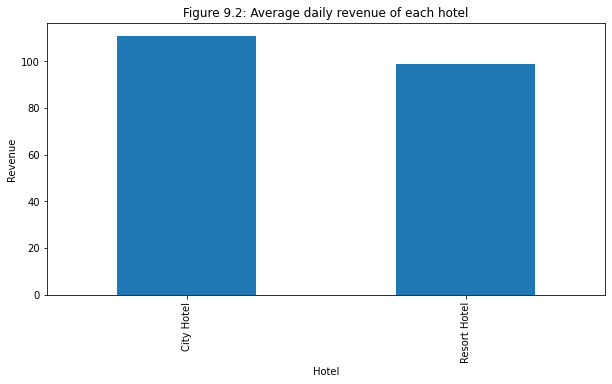

In [ ]:
average_daily_revenue_by_hotel.plot(kind = 'bar')
plt.title('Figure 9.2: Average daily revenue of each hotel')
plt.xlabel('Hotel')
plt.ylabel('Revenue')

####Inference
From the above figure 9.2 we can observe that the Average Daily Revenue of city hotels is more than the Average Daily Revenue of resort hotels.

#### 10. Which hotel has higher lead time?

          hotel  median_lead_time
0    City Hotel              50.0
1  Resort Hotel              47.0


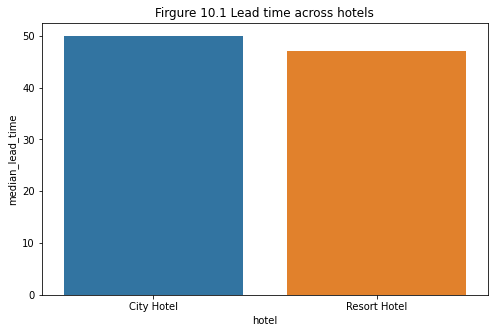

In [ ]:
grp_by_Hotel = hotel_df.groupby(['hotel'])
lead_time_by_totel = grp_by_Hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
print(lead_time_by_totel)
plt.figure(figsize = (8,5))
plt.title('Firgure 10.1 Lead time across hotels')
sns.barplot(x = lead_time_by_totel['hotel'], y = lead_time_by_totel['median_lead_time'] )
plt.show()

#### Inference
From the above figure 10.1 we can say that city hotels have more lead time than resort hotels.  